# <span style="color:red"> Face Comparison </span>

In [1]:
import cv2

import os
os.chdir(r'W:\face recognition')

from face_recognition import face_encodings, compare_faces

import matplotlib.pyplot as plt
# %matplotlib notebook

In [2]:
def imshow(img):
    plt.imshow(img, )
    plt.axis('off')
    plt.show()

In [57]:
def rgb_read(path, show=False):
    bgr_img = cv2.imread(path)
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    
    if show:
        imshow(rgb_img)
    return rgb_img

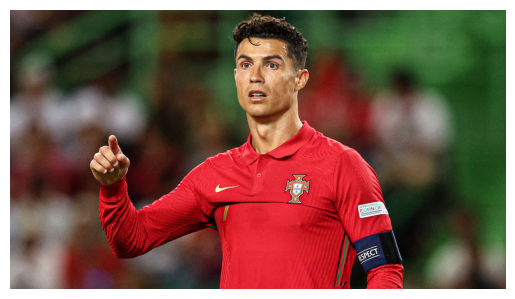

In [59]:
cr7 = rgb_read('Ronaldo.png', show = True)

In [60]:
cr7_enc = face_encodings(cr7)[0]
len(img_enc)

128

In [61]:
cr7_enc

array([-0.16948089,  0.08286603,  0.02958897, -0.03998974, -0.06908935,
        0.04774132, -0.02197397, -0.0379566 ,  0.06734506, -0.01396992,
        0.27425811, -0.06150249, -0.31441978, -0.05462579, -0.11343377,
        0.13341236, -0.20131081, -0.07890178, -0.13511062, -0.09884121,
        0.08788773, -0.02377173, -0.0226596 ,  0.06375398, -0.17840628,
       -0.20873189, -0.00232422, -0.12548862,  0.03215795, -0.13677903,
       -0.04989246, -0.05562856, -0.19109836, -0.08254191, -0.0260954 ,
        0.01371037, -0.04596405, -0.06566083,  0.19166541, -0.01518339,
       -0.10445128,  0.0560444 ,  0.03281657,  0.32689494,  0.17879951,
        0.05359341,  0.02411918, -0.06688312,  0.1552909 , -0.35905135,
        0.00554932,  0.18126482,  0.10783448,  0.05395163, -0.01058127,
       -0.17097859,  0.02070796,  0.19219871, -0.18459623,  0.15475492,
        0.05695279, -0.08653744,  0.02578457, -0.06828249,  0.19526543,
        0.08096197, -0.15542752, -0.0758678 ,  0.12452368, -0.08

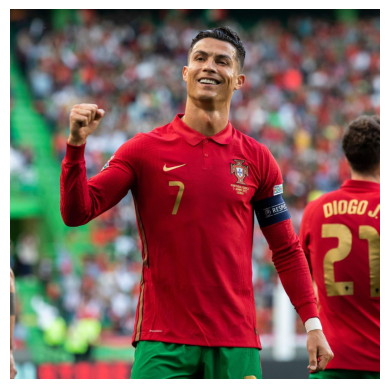

In [62]:
cr7_2 = rgb_read('images/ronaldo.jpg', show=True)

In [63]:
img_enc_1 = face_encodings(cr7_2)[0]
len(img_enc_2)

128

In [64]:
result = compare_faces([cr7_enc], img_enc_1)
result

[True]

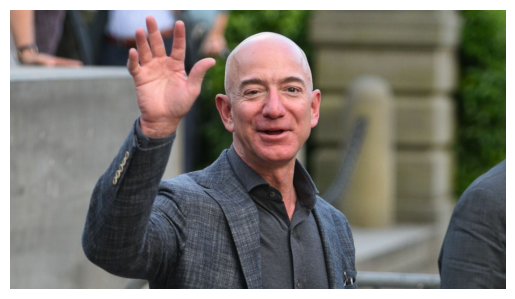

In [65]:
bezos = rgb_read('images/bezos.jpg', show=True)

In [66]:
img_enc_2 = face_encodings(bezos)[0]
len(img_enc_2)

128

In [67]:
result = compare_faces([cr7_enc], img_enc_2)
result

[False]

In [34]:
images = os.listdir('images')
images

['benzema.jpg',
 'bezos.jpg',
 'Bill.jpg',
 'elon.jpg',
 'mpappe.jpg',
 'ronaldo.jpg']

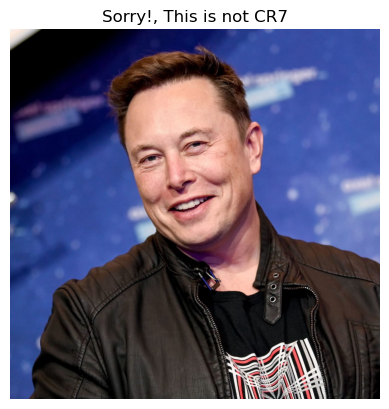

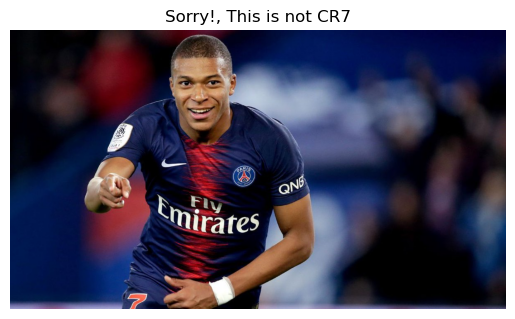

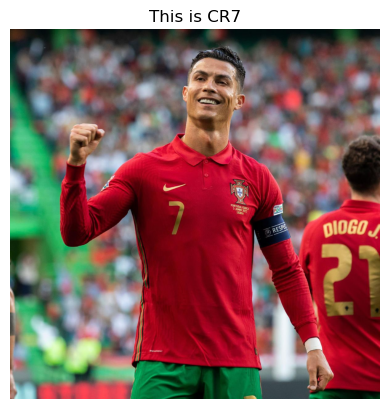

In [81]:
for i, img in enumerate(images[-3:], 1):
    img_path = 'images/'+img
    arr_img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    
    img_enc = face_encodings(arr_img)[0]
    res = compare_faces([cr7_enc], img_enc)
    
    if res[0]:
        title = f'This is CR7'
    else:
        title = f'Sorry!, This is not CR7'
    
    plt.imshow(arr_img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# <span style="color:red"> Face Recognition and Detection in real time</span>

In [2]:
from face_recodetection import name_and_feature_extraction, detect_and_recognize

In [3]:
encs, nms = name_and_feature_extraction('images')
assert len(encs)==len(nms)

In [4]:
type(encs)

list

In [5]:
len(encs)

7

In [6]:
nms

['Ayad',
 'Bill Gates',
 'Elon Musk',
 'Jeff Bezos',
 'Karim Benzema',
 'Mpappe',
 'Ronaldo']

In [7]:
cap = cv2.VideoCapture('input.mp4')
cap.isOpened()

True

In [8]:
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(w)
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(h)

1080
1920


In [9]:
# Just to save the video
fourcc = cv2.VideoWriter_fourcc(*"X264") # or *"XVID" / *"X264"
path = 'outcome.mp4'
out = cv2.VideoWriter(path, fourcc, 28, (400, 600))

In [ ]:
while cap.isOpened():
    
    ret, frame = cap.read()
    
    if ret is True:
        
        frame = cv2.flip(frame, 1)
        frame = cv2.flip(frame, 0)
        frame = cv2.resize(frame, (400, 600))

        face_locs, face_names = detect_and_recognize(frame, encs, nms)

        for face_loc, face_name in zip(face_locs, face_names):
            y1, x2, y2, x1 = face_loc

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, face_name, (x1, y1-10), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)

        # cv2.imshow('face_recognition', frame)
        out.write(frame)

        if cv2.waitKey(30)==ord('q'):
            break
    else:
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()